# EBLR

In [1]:
from lineartree import LinearBoostClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from joblib import dump
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.classification_metrics import classification

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/car_insurance.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/car_insurance.parquet')

y_train = train.OUTCOME
X_train = train.drop(columns=['OUTCOME'])

y_validation = validation.OUTCOME
X_validation = validation.drop(columns=['OUTCOME'])

In [5]:
scaler = StandardScaler().fit(X_train, y_train)

X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [6]:
max_depth = [1, 2, 3]
n_est = [1, 2, 3, 4, 5]
base_est =  [LogisticRegression(penalty=None), LogisticRegression(), LogisticRegression(penalty='l1', solver='liblinear')]

In [7]:
models_list = []
for n in n_est:
    for i in max_depth:
        for est in base_est:
            models_list.append(LinearBoostClassifier(base_estimator=est, n_estimators=n, max_depth=i))

In [8]:
names_list = []
for n in n_est:
    for depth in max_depth:
        for est in base_est:
            if est.penalty == None:
                name = f'EBLR_{depth}_{n}'
            elif est.penalty == 'l2':
                name = f'EBLR_{depth}_{n}_l2'
            elif est.penalty == 'l1':
                name = f'EBLR_{depth}_{n}_l1'
            elif est.penalty == 'elasticnet':
                name = f'EBLR_{depth}_{n}_en_{est.l1_ratio}'
            else:
                raise ValueError('Unknown base estimator type')

            names_list.append(name)

In [9]:
metrics = classification(models_list, names_list, '../../../data/metrics/car_insurance/eblr.csv', X_train_scaled, y_train, X_validation_scaled, y_validation, metrics={})
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
EBLR_1_1,0.113695,0.905287,0.901031,-0.470126
EBLR_1_1_l2,0.056847,0.905271,0.901027,-0.468743
EBLR_1_1_l1,0.982258,0.905255,0.900962,-0.474213
EBLR_2_1,0.064851,0.905285,0.901046,-0.468255
EBLR_2_1_l2,0.061807,0.905270,0.901036,-0.467757
EBLR_2_1_l1,0.492676,0.905255,0.900962,-0.474244
EBLR_3_1,0.078788,0.911907,0.912561,0.071777
EBLR_3_1_l2,0.069812,0.911529,0.911350,-0.019679
EBLR_3_1_l1,0.702407,0.911872,0.912410,0.058978
EBLR_1_2,0.092750,0.905284,0.901044,-0.468428


In [14]:
metrics.sort_values(by='Validation_AUC', ascending=False).head(10)

,Run_Time,Train_AUC,Validation_AUC,delta%
EBLR_3_1,0.078788,0.911907,0.912561,0.071777
EBLR_3_1_l1,0.702407,0.911872,0.912410,0.058978
EBLR_3_2_l1,0.415882,0.912089,0.912255,0.018182
EBLR_3_4_l1,1.306003,0.912376,0.911991,-0.042112
EBLR_3_2,0.133384,0.912210,0.911983,-0.024804
EBLR_3_3_l1,0.934674,0.912358,0.911824,-0.058559
EBLR_3_4,0.321141,0.912443,0.911724,-0.078817
EBLR_3_5_l1,1.486235,0.912454,0.911708,-0.081843
EBLR_3_3,0.214497,0.912429,0.911571,-0.094049
EBLR_3_5_l2,0.326124,0.912035,0.911438,-0.065483


We choose **EBLR_3_2_l1** because it has better delta

In [11]:
test =  pd.read_parquet('../../../data/model_input/test_sets/car_insurance.parquet')

y_test = test.OUTCOME
X_test = test.drop(columns=['OUTCOME'])

In [12]:
retrain = pd.concat([train, validation])

y_retrain = retrain.OUTCOME
X_retrain = retrain.drop(columns=['OUTCOME'])

In [13]:
scaler_retrain = StandardScaler().fit(X_retrain)

X_retrain_scaled = scaler_retrain.transform(X_retrain)
X_test_scaled = scaler_retrain.transform(X_test)

In [19]:
model = LinearBoostClassifier(base_estimator=LogisticRegression(penalty='l1', solver='liblinear'), max_depth=3, n_estimators=2).fit(X_retrain_scaled, y_retrain)

In [20]:
test_pred = model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 0.9225


In [21]:
dump(model, 'best_eblr.joblib')

['best_eblr.joblib']

In [22]:
with open('../../../data/metrics/car_insurance/final_AUC.txt', 'a') as f:
    f.write('\nEBLR, '+ str(auc))

In [23]:
print(f'Initial number of features: {X_retrain.shape[1]}\nFinal number of features: {model.transform(X_retrain_scaled).shape[1]}')

Initial number of features: 32
Final number of features: 34


In [24]:
error_trees = model._trees

#### New Feature 1

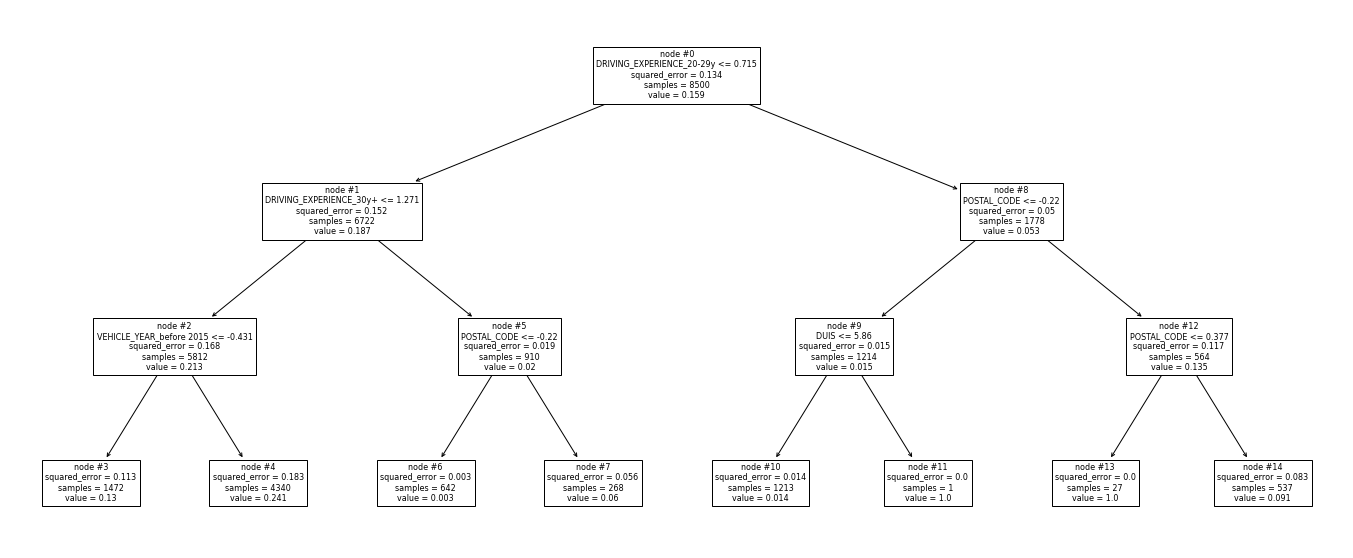

In [30]:
plt.figure(figsize=(24, 10))
plot_tree(error_trees[0], node_ids=True, feature_names=X_retrain.columns);

In [31]:
pred = np.abs(error_trees[0].predict(X_retrain_scaled))
worst_leaf = np.argmax(pred)
error_path = error_trees[0].decision_path(X_retrain_scaled[[worst_leaf]]).toarray()
indexes = np.where(error_path == 1)[1]

path1 = []
for i in indexes[:-1]:
    path1.append(str(X_retrain.columns[error_trees[0].tree_.feature[i]])+' <= '+str(error_trees[0].tree_.threshold[i]))
path1.append('leaf value: '+str(model._leaves[0]))

path1

['DRIVING_EXPERIENCE_20-29y <= 0.7150449156761169',
 'POSTAL_CODE <= -0.21980943158268929',
 'POSTAL_CODE <= 0.3772913031280041',
 'leaf value: 1.0']

$False, False, True$ is the response path followed by the samples that get a 1 for this feature

In [32]:
pred_tree = np.abs(error_trees[0].predict(X_retrain_scaled.astype(np.float32), check_input=False))
pred_tree = (pred_tree == model._leaves[0]).astype(np.float32)
pred_tree = pred_tree.reshape(-1, 1)
X_trans = np.concatenate([X_retrain_scaled, pred_tree], axis=1)

#### New Feature 2

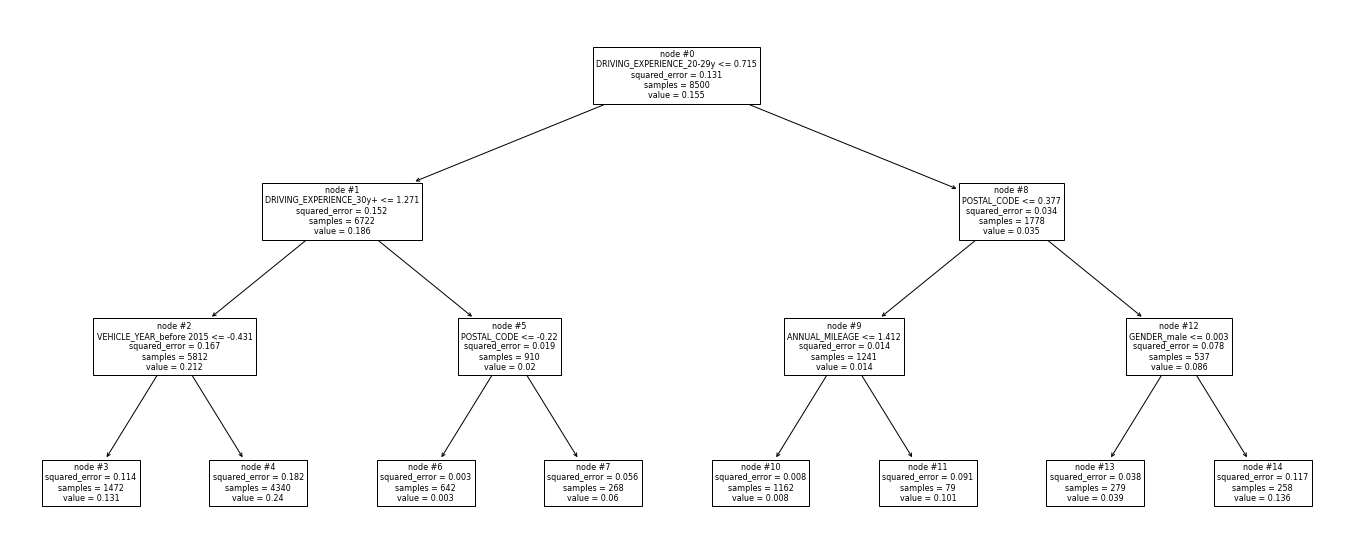

In [34]:
plt.figure(figsize=(24, 10))
plot_tree(error_trees[1], node_ids=True, feature_names=list(X_retrain.columns)+['New_Feature_1']);

In [35]:
pred = np.abs(error_trees[1].predict(X_trans))
worst_leaf = np.argmax(pred)
error_path = error_trees[1].decision_path(X_trans[[worst_leaf]]).toarray()
indexes = np.where(error_path == 1)[1]

path2 = []
for i in indexes[:-1]:
    path2.append(str(list(list(X_retrain.columns)+['New_Feature_1'])[error_trees[1].tree_.feature[i]])+' <= '+str(error_trees[1].tree_.threshold[i]))
path2.append('leaf value: '+str(model._leaves[1]))

path2

['DRIVING_EXPERIENCE_20-29y <= 0.7150449156761169',
 'DRIVING_EXPERIENCE_30y+ <= 1.270881026983261',
 'VEHICLE_YEAR_before 2015 <= -0.43095099925994873',
 'leaf value: 0.2400921658986175']

This feature assigns 1 to samples that make $True, True, False$ along this path.

In [53]:
top_threshold = 0.16
top_coefficients = [coef for coef in model.base_estimator_.coef_.ravel() if abs(coef) > top_threshold]
top_features = [name for name, coef in zip(X_retrain.columns, model.base_estimator_.coef_.ravel()) if abs(coef) > top_threshold]
labels = [' ' if feature not in top_features else feature for feature in X_retrain.columns]+['New_Feature_1']+['New_Feature_2']

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_3556/4237429041.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=50, ha='right')


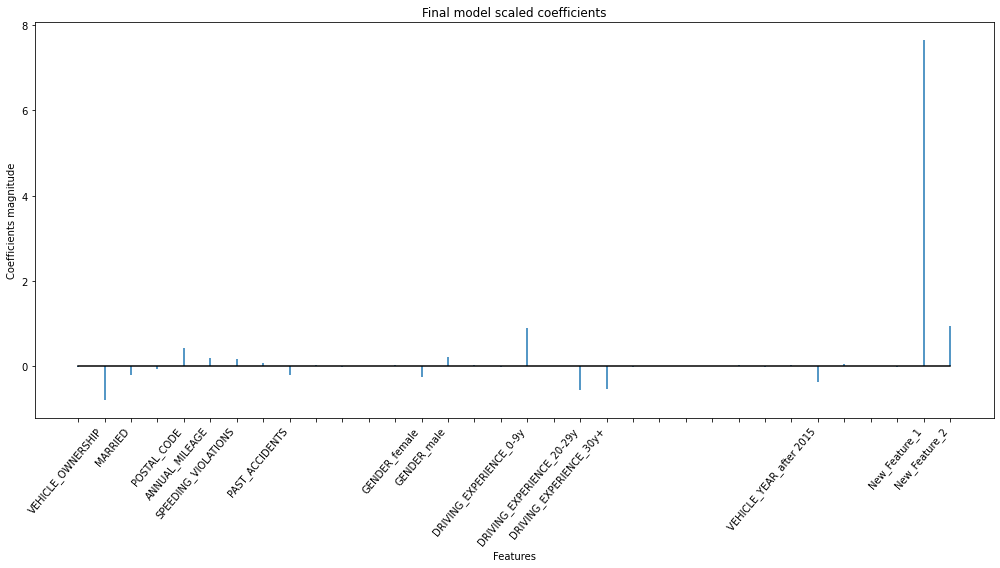

In [54]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.stem(list(list(X_retrain.columns)+['New_Feature_1']+['New_Feature_2']), model.base_estimator_.coef_.ravel(), markerfmt=' ', basefmt='k-')
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients magnitude')
ax.set_title('Final model scaled coefficients')
ax.set_xticklabels(labels, rotation=50, ha='right')
plt.tight_layout()
plt.show()